In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [3]:
def load_data():
    data_dir = 'input/'

    df = pd.read_csv(data_dir + 'climate_change_impact.csv')
    return df

In [4]:
df = load_data()

### 1. Apakah penggunaan pupuk dan pestisida memengaruhi hasil tanaman secara signifikan?

### 2. Apakah penggunaan pupuk dan pestisida memengaruhi hasil tanaman secara signifikan?

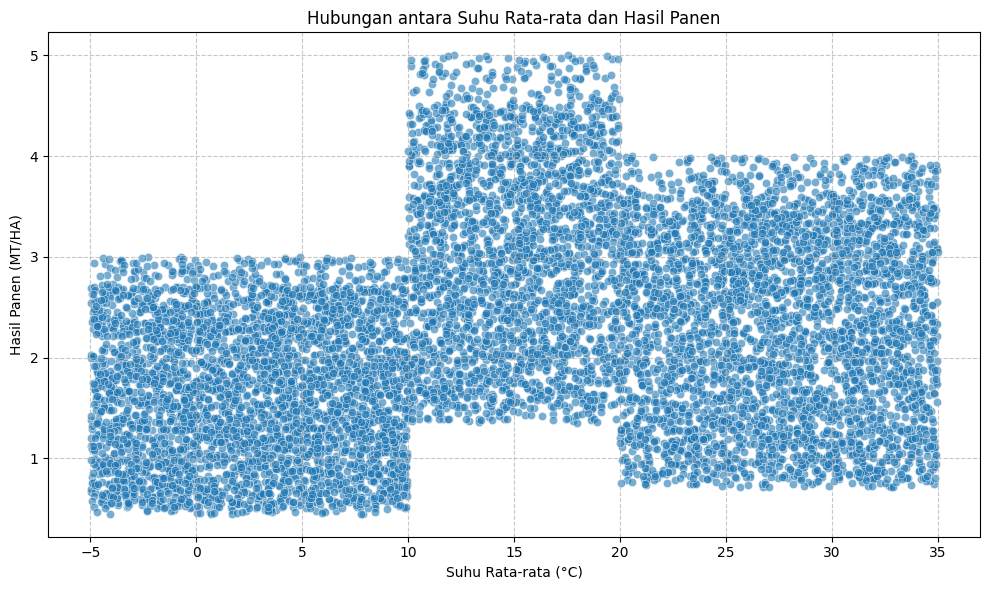

Koefisien Korelasi antara Suhu Rata-rata dan Hasil Panen: 0.2638


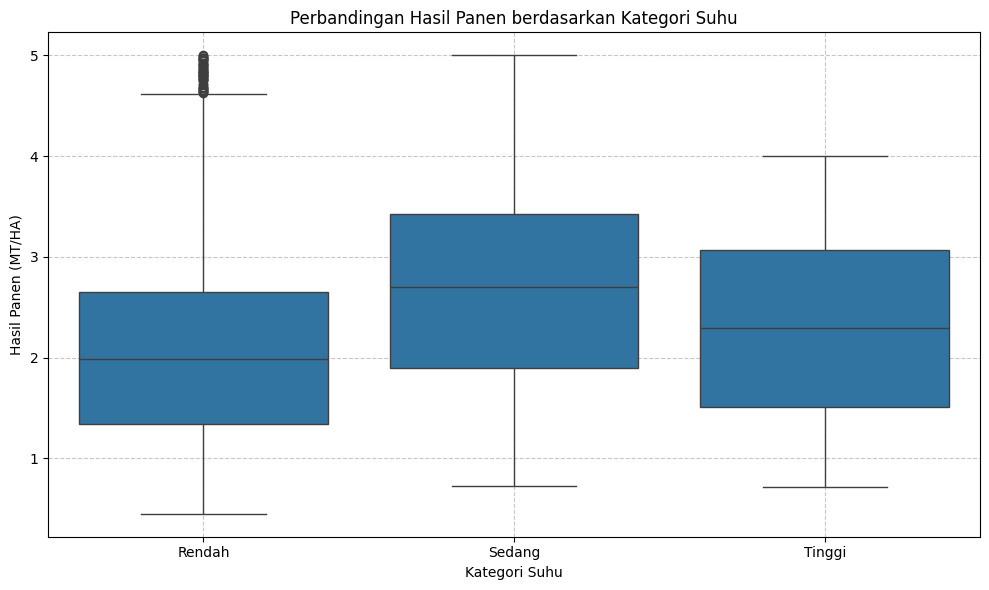

In [7]:
# 1. Visualisasi hubungan antara suhu rata-rata dan hasil panen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', data=df, alpha=0.6)
plt.title('Hubungan antara Suhu Rata-rata dan Hasil Panen')
plt.xlabel('Suhu Rata-rata (°C)')
plt.ylabel('Hasil Panen (MT/HA)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Hitung koefisien korelasi
correlation = df['Average_Temperature_C'].corr(df['Crop_Yield_MT_per_HA'])
print(f"Koefisien Korelasi antara Suhu Rata-rata dan Hasil Panen: {correlation:.4f}")


# 3. Kategorisasi suhu untuk analisis lebih lanjut
# Buat kategori: rendah (<15°C), sedang (15-25°C), tinggi (>25°C)
df['Temperature_Category'] = pd.cut(
    df['Average_Temperature_C'], 
    bins=[0, 15, 25, 40], 
    labels=['Rendah', 'Sedang', 'Tinggi']
)

# 4. Boxplot untuk membandingkan hasil panen berdasarkan kategori suhu
plt.figure(figsize=(10, 6))
sns.boxplot(x='Temperature_Category', y='Crop_Yield_MT_per_HA', data=df)
plt.title('Perbandingan Hasil Panen berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Hasil Panen (MT/HA)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Apakah penggunaan pupuk dan pestisida memengaruhi hasil tanaman secara signifikan?

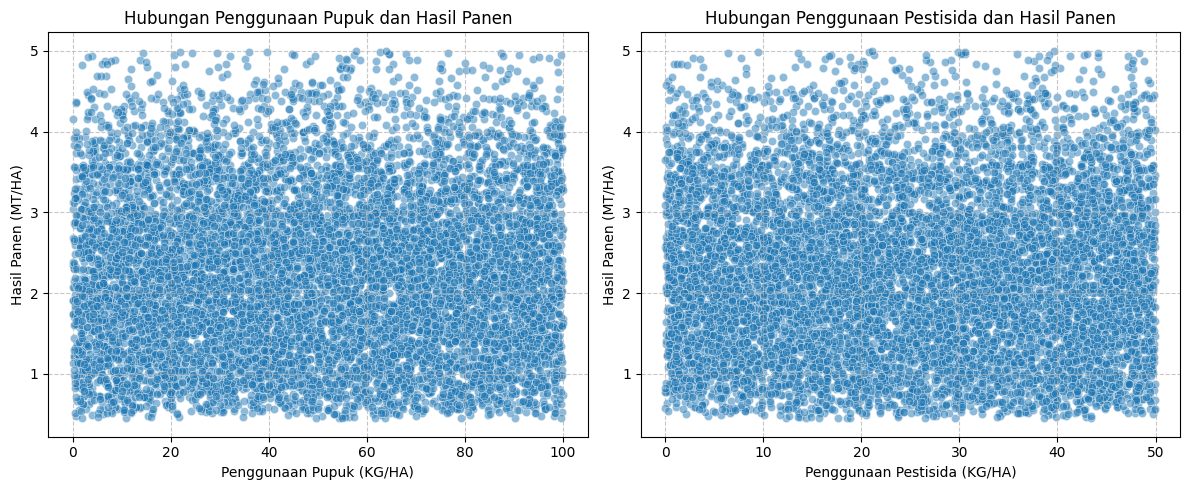

Korelasi antara Penggunaan Pupuk dan Hasil Panen: 0.0064
Korelasi antara Penggunaan Pestisida dan Hasil Panen: -0.0040

Model Regresi - Pupuk:
Koefisien: 0.000223
Intercept: 2.228856
R² Score: 0.000041

Model Regresi - Pestisida:
Koefisien: -0.000278
Intercept: 2.246954
R² Score: 0.000016


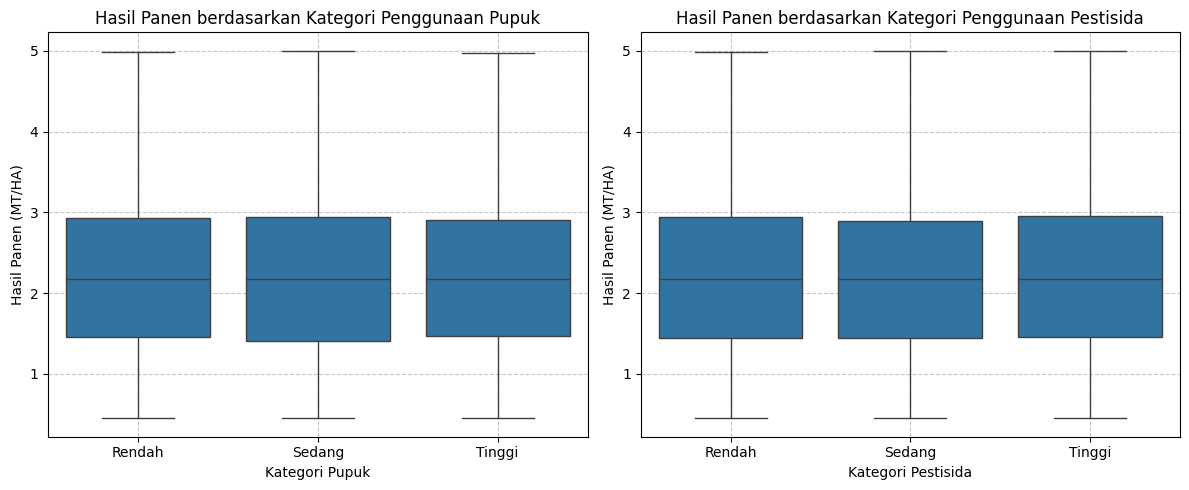

In [ ]:
# 1. Visualisasi hubungan antara pupuk dan hasil panen
plt.figure(figsize=(12, 5))

# Subplot untuk pupuk
plt.subplot(1, 2, 1)
sns.scatterplot(x='Fertilizer_Use_KG_per_HA', y='Crop_Yield_MT_per_HA', data=df, alpha=0.5)
plt.title('Hubungan Penggunaan Pupuk dan Hasil Panen')
plt.xlabel('Penggunaan Pupuk (KG/HA)')
plt.ylabel('Hasil Panen (MT/HA)')
plt.grid(True, linestyle='--', alpha=0.7)

# Subplot untuk pestisida
plt.subplot(1, 2, 2)
sns.scatterplot(x='Pesticide_Use_KG_per_HA', y='Crop_Yield_MT_per_HA', data=df, alpha=0.5)
plt.title('Hubungan Penggunaan Pestisida dan Hasil Panen')
plt.xlabel('Penggunaan Pestisida (KG/HA)')
plt.ylabel('Hasil Panen (MT/HA)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 2. Hitung korelasi
corr_fertilizer = df['Fertilizer_Use_KG_per_HA'].corr(df['Crop_Yield_MT_per_HA'])
corr_pesticide = df['Pesticide_Use_KG_per_HA'].corr(df['Crop_Yield_MT_per_HA'])

print(f"Korelasi antara Penggunaan Pupuk dan Hasil Panen: {corr_fertilizer:.4f}")
print(f"Korelasi antara Penggunaan Pestisida dan Hasil Panen: {corr_pesticide:.4f}")

# 3. Analisis regresi sederhana untuk pupuk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Model untuk pupuk
X_fert = df[['Fertilizer_Use_KG_per_HA']].values
model_fert = LinearRegression()
model_fert.fit(X_fert, df['Crop_Yield_MT_per_HA'])
y_pred_fert = model_fert.predict(X_fert)
r2_fert = r2_score(df['Crop_Yield_MT_per_HA'], y_pred_fert)

# Model untuk pestisida
X_pest = df[['Pesticide_Use_KG_per_HA']].values
model_pest = LinearRegression()
model_pest.fit(X_pest, df['Crop_Yield_MT_per_HA'])
y_pred_pest = model_pest.predict(X_pest)
r2_pest = r2_score(df['Crop_Yield_MT_per_HA'], y_pred_pest)

print(f"\nModel Regresi - Pupuk:")
print(f"Koefisien: {model_fert.coef_[0]:.6f}")
print(f"Intercept: {model_fert.intercept_:.6f}")
print(f"R² Score: {r2_fert:.6f}")

print(f"\nModel Regresi - Pestisida:")
print(f"Koefisien: {model_pest.coef_[0]:.6f}")
print(f"Intercept: {model_pest.intercept_:.6f}")
print(f"R² Score: {r2_pest:.6f}")

# 4. Kategorisasi penggunaan pupuk dan pestisida
# Buat kategori: rendah, sedang, tinggi berdasarkan persentil
df['Fertilizer_Category'] = pd.qcut(
    df['Fertilizer_Use_KG_per_HA'], 
    q=3, 
    labels=['Rendah', 'Sedang', 'Tinggi']
)

df['Pesticide_Category'] = pd.qcut(
    df['Pesticide_Use_KG_per_HA'], 
    q=3, 
    labels=['Rendah', 'Sedang', 'Tinggi']
)

# 5. Boxplot untuk membandingkan hasil panen berdasarkan kategori
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Fertilizer_Category', y='Crop_Yield_MT_per_HA', data=df)
plt.title('Hasil Panen berdasarkan Kategori Penggunaan Pupuk')
plt.xlabel('Kategori Pupuk')
plt.ylabel('Hasil Panen (MT/HA)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.boxplot(x='Pesticide_Category', y='Crop_Yield_MT_per_HA', data=df)
plt.title('Hasil Panen berdasarkan Kategori Penggunaan Pestisida')
plt.xlabel('Kategori Pestisida')
plt.ylabel('Hasil Panen (MT/HA)')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 4. Apakah wilayah dengan irigasi lebih tinggi memiliki hasil panen yang lebih baik?

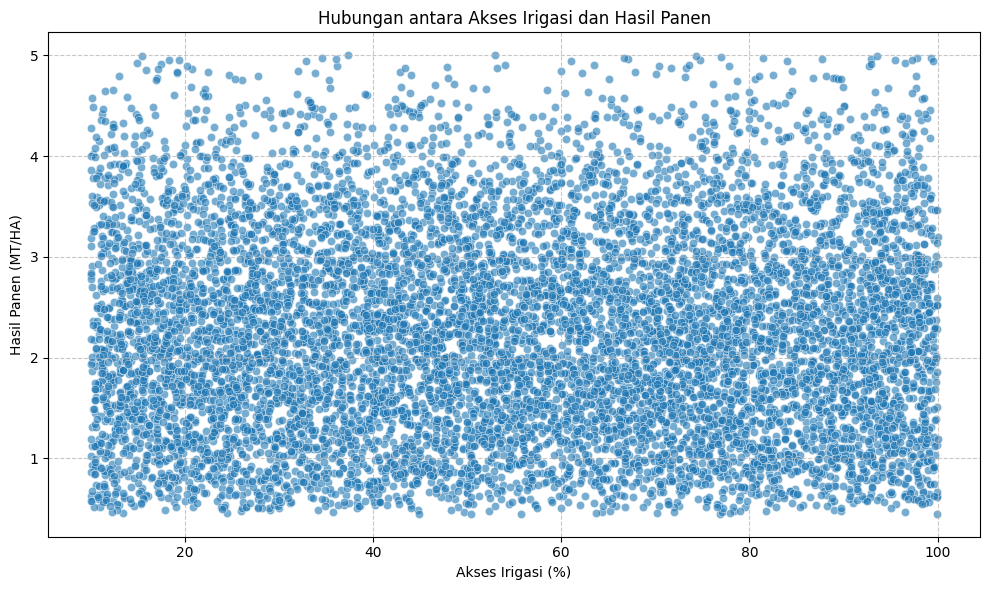

Koefisien Korelasi antara Akses Irigasi dan Hasil Panen: -0.0003


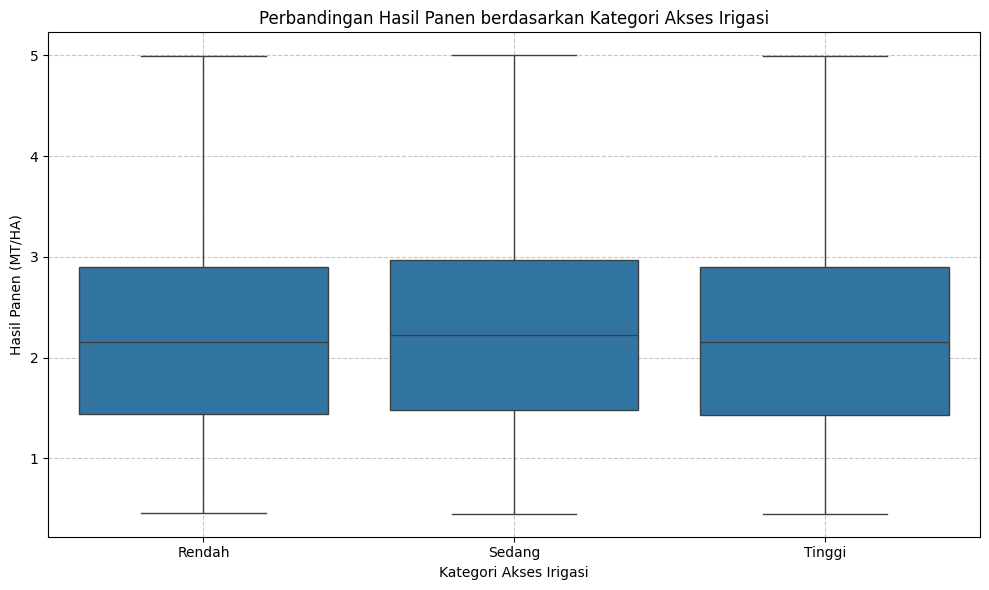

In [ ]:
# 1. Visualisasi hubungan antara irigasi dan hasil panen dengan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Irrigation_Access_%', y='Crop_Yield_MT_per_HA', data=df, alpha=0.6)
plt.title('Hubungan antara Akses Irigasi dan Hasil Panen')
plt.xlabel('Akses Irigasi (%)')
plt.ylabel('Hasil Panen (MT/HA)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Hitung koefisien korelasi
correlation = df['Irrigation_Access_%'].corr(df['Crop_Yield_MT_per_HA'])
print(f"Koefisien Korelasi antara Akses Irigasi dan Hasil Panen: {correlation:.4f}")

# 3. Kategorisasi akses irigasi untuk perbandingan grup
# Buat kategori irigasi: rendah (<33%), sedang (33-66%), tinggi (>66%)
df['Irrigation_Category'] = pd.cut(
    df['Irrigation_Access_%'], 
    bins=[0, 33, 66, 100], 
    labels=['Rendah', 'Sedang', 'Tinggi']
)

# 4. Boxplot untuk membandingkan hasil panen berdasarkan kategori irigasi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Irrigation_Category', y='Crop_Yield_MT_per_HA', data=df)
plt.title('Perbandingan Hasil Panen berdasarkan Kategori Akses Irigasi')
plt.xlabel('Kategori Akses Irigasi')
plt.ylabel('Hasil Panen (MT/HA)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()